# TP1 IIA 2024

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Funciones de generación

### Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [ ]:
def covM(d, C):
  return np.identity(d)*([C*np.sqrt(d)]*d)

def diagonales(n, d, C):
  #Clase0
  c0 = [np.append(x, 0) for x in np.random.multivariate_normal([-1]*d, covM(d, C), int(n/2))]
  #Clase1
  c1 = [np.append(x, 1) for x in np.random.multivariate_normal([1]*d, covM(d, C), int(n/2))]

  flist = c0 + c1
  # Crear DataFrame
  df = pd.DataFrame(flist, columns=[f'dim_{i}' for i in range(d)] + ['class'])
  return df

### Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

In [ ]:
def covM2(d, C):
  return np.identity(d)*([C]*d)

def paralelas(n, d, C):
  #Clase0
  c0 = [np.append(x, 0) for x in np.random.multivariate_normal([-1] + [0]*(d-1), covM2(d, C), int(n/2))]
  #Clase1
  c1 = [np.append(x, 1) for x in np.random.multivariate_normal([1] + [0]*(d-1), covM2(d, C), int(n/2))]

  flist = c0 + c1
  # Crear DataFrame
  df = pd.DataFrame(flist, columns=[f'dim_{i}' for i in range(d)] + ['class'])
  return df

### Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

In [66]:
def cartesian_to_polar(x, y):
    rho = (x**2 + y**2)**0.5
    theta = math.atan2(y, x)
    return rho, theta

def is_inside_curve(rho, theta, npi):
  rho_curve1 = (theta + (npi-1)*math.pi) / (4 * math.pi)
  rho_curve2 = (theta + npi*math.pi) / (4 * math.pi)
  return rho_curve1 <= rho <= rho_curve2

def is_inside_curves(x, y):
    rho, theta = cartesian_to_polar(x, y)
    return is_inside_curve(rho, theta, 1) or is_inside_curve(rho, theta, 3) or is_inside_curve(rho, theta, 5)

def espirales(n):
  count0 = 0
  count1 = 0
  l = []
  while (count0 + count1) < n:
    x = np.random.uniform(-1, 1, 1)
    y = np.random.uniform(-1, 1, 1)
    if ((x**2 + y**2)**0.5 < 1): # si esta adentro del circulo
      if (is_inside_curves(x, y)):
        if count0 < int(n/2):
          l.append([x, y, 0])
          count0+=1
      else:
        if count1 < int(n/2):
          l.append([x, y, 1])
          count1+=1
  df = pd.DataFrame(l, columns=['dim_1', 'dim_2', 'class'])
  return df

## Ejercicio 1

### Código

In [ ]:
sizes = [150, 600, 3000]
dataframes_training = [espirales(x) for x in sizes]
dataframe_test = espirales(10000)

<ipython-input-4-d3ff5f2296b3>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta = math.atan2(y, x)


In [ ]:
trees = []
for df in dataframes_training:
  target = df["class"].values.tolist()
  df = df.drop(columns=["class"])
  data = df.to_numpy()
  t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
  t.fit(data, target)
  trees.append(t)

<ipython-input-65-22e8258996ee>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


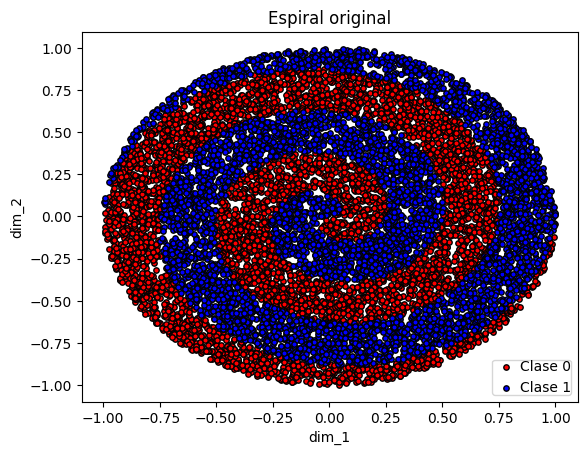

In [ ]:
target = dataframe_test["class"].to_numpy()
feature_names = list(dataframe_test.columns.values)[:-1]
target_names= list(set(dataframe_test["class"].values.tolist()))
dataframe_test_2 = dataframe_test.drop(columns=["class"])
test_data = dataframe_test_2.to_numpy()

idx = np.where(target == 0)
plt.scatter(
    test_data[idx, 0],
    test_data[idx, 1],
    c=['r'],
    label="Clase 0",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=15,
)

idx = np.where(target == 1)
plt.scatter(
    test_data[idx, 0],
    test_data[idx, 1],
    c=['b'],
    label="Clase 1",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=15,
)

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.title(f'Espiral original')
plt.show()

<ipython-input-56-7f2c184bec7b>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-56-7f2c184bec7b>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


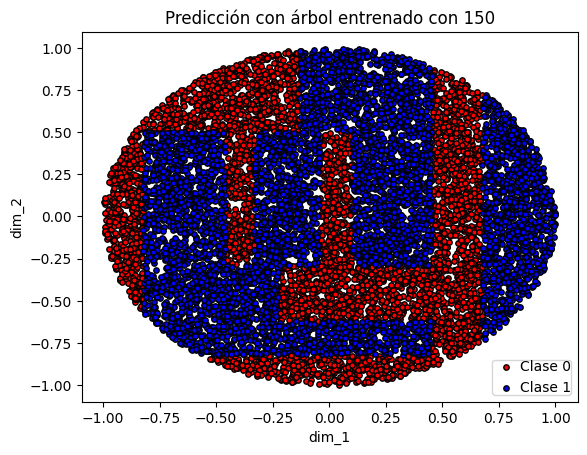

El valor de accuracy obtenido es: 0.6603


<ipython-input-56-7f2c184bec7b>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-56-7f2c184bec7b>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


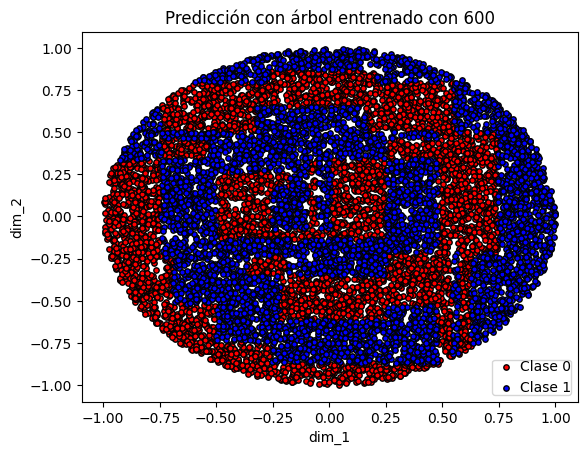

El valor de accuracy obtenido es: 0.8311


<ipython-input-56-7f2c184bec7b>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-56-7f2c184bec7b>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


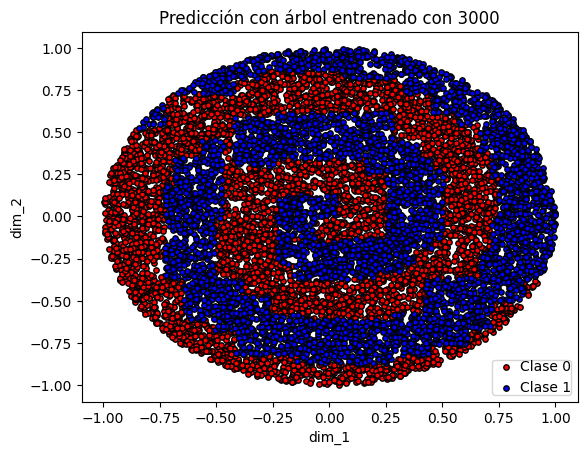

El valor de accuracy obtenido es: 0.9165


In [ ]:
n_classes = 2
plot_colors = "rb"

for idt, t in enumerate(trees):
  prediction = t.predict(test_data)
  idx = np.where(prediction == 0)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['r'],
      label="Clase 0",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  idx = np.where(prediction == 1)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['b'],
      label="Clase 1",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  plt.xlabel(feature_names[0])
  plt.ylabel(feature_names[1])
  plt.legend(loc="lower right", borderpad=0, handletextpad=0)
  plt.title(f'Predicción con árbol entrenado con {sizes[idt]}')
  plt.show()

  accuracy = accuracy_score(target, prediction)

  print("El valor de accuracy obtenido es: {}".format(accuracy))

### Análisis

Podemos ver que mientras mas puntos tiene el conjunto de entrenamiento mejor es la accuracy de cada arbol. Esto se ve reflejado en las graficas de las predicciones, por ejemplo en la prediccion del primer arbol, el que fue entrenado con 150 puntos, la grafica no se parece al espiral original en lo absoluto. En la grafica del segundo arbol se puede notar como empieza a tomar un poco mas de forma el espiral, lo cual esta dado por la mejora considerable del accuracy. Por ultimo, el tercer arbol, el generado con 3000 puntos de entrenamiento, tenemos un accuracy superior al 90%, lo cual es muy facil de ver en la grafica ya que es muy similar a los espirales originales.